NAME: Bhavik Ransubhe

CLASS : B.E ( B ) COMP

ROLL NO: 41261

CASE STUDY 2: Face recognition using SVM or Product review case study in area of sentimental analysis using SVM and random forest classifiers

FACE RECOGNITION USING SVM

In [1]:
#import libraries
import pylab as pl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

The lfw dataset consists of a database of face photographs designed for studying the problem of unconstrained face recognition. 

In [2]:
#load data into numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
#introspect the image arrays to find the shape of the pictures
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

In [4]:
X = lfw_people.data
n_features = X.shape[1]

In [5]:
#target label and names
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [6]:
#print out the variables
print("Total dataset size:")
print("n_samples: %d", n_samples)
print("n_features: %d", n_features)
print("n_classes: %d", n_classes)

Total dataset size:
n_samples: %d 1288
n_features: %d 1850
n_classes: %d 7


In [7]:
#Splitting into train and 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Dimension Reduction using PCA

In [8]:
n_components = 50
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

In [9]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [10]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Training SVM Classifier

In [11]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set


C:\Users\bhavi\.Origin\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [12]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_test_pca)

Predicting the people names on the testing set


Classification Report and Confusion Matrix

In [13]:
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.59      0.77      0.67        13
     Colin Powell       0.83      0.92      0.87        60
  Donald Rumsfeld       0.68      0.56      0.61        27
    George W Bush       0.87      0.90      0.88       146
Gerhard Schroeder       0.75      0.72      0.73        25
      Hugo Chavez       0.77      0.67      0.71        15
       Tony Blair       0.86      0.69      0.77        36

         accuracy                           0.82       322
        macro avg       0.76      0.75      0.75       322
     weighted avg       0.82      0.82      0.82       322



In [14]:
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

[[ 10   1   1   1   0   0   0]
 [  0  55   1   4   0   0   0]
 [  4   2  15   5   1   0   0]
 [  1   4   4 131   1   2   3]
 [  0   0   1   5  18   1   0]
 [  0   2   0   1   1  10   1]
 [  2   2   0   4   3   0  25]]


Plotting

In [15]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

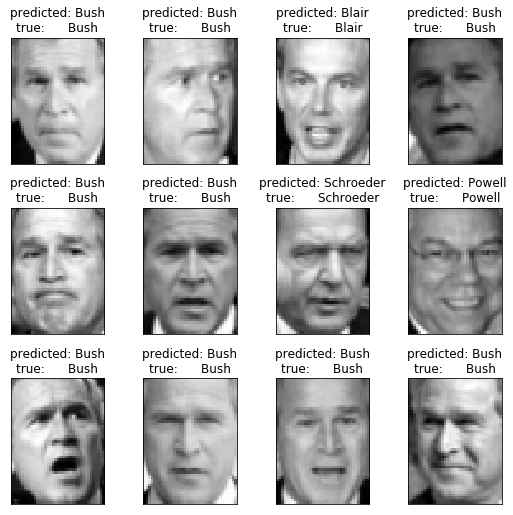

In [16]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)

Plotting Eigenfaces

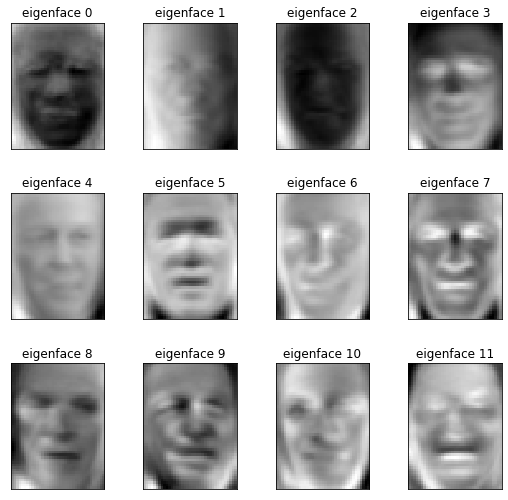

In [17]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

Accuracy

In [18]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.8198757763975155
